**Exercise**: 

Create a network with 

    784 input units, 

    a hidden layer with 128 units and a ReLU activation, 
    
    then a hidden layer with 64 units and a ReLU activation, 
    
    and finally an output layer with a softmax activation as shown above. 

You can use a ReLU activation with the **nn.ReLU** module or **F.relu** function.

In [27]:


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from torch import nn
import torch.nn.functional as F
#import torch
import matplotlib.pyplot as plt

import helper

In [28]:
from torchvision import datasets, transforms

In [29]:
#define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                           transforms.Normalize((0.5, 0.5,0.5),
                                               (0.5, 0.5, 0.5))
                           ])
#download the training set data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64, shuffle=True)

In [30]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784,128) #hidden layer 1
        self.fc2 = nn.Linear(128,64) #hidden layer 2
        self.fc3 = nn.Linear(64,10) #output
        
    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim = 1)
        
        return x
    
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Use the above trained network to predict the image from NNIST

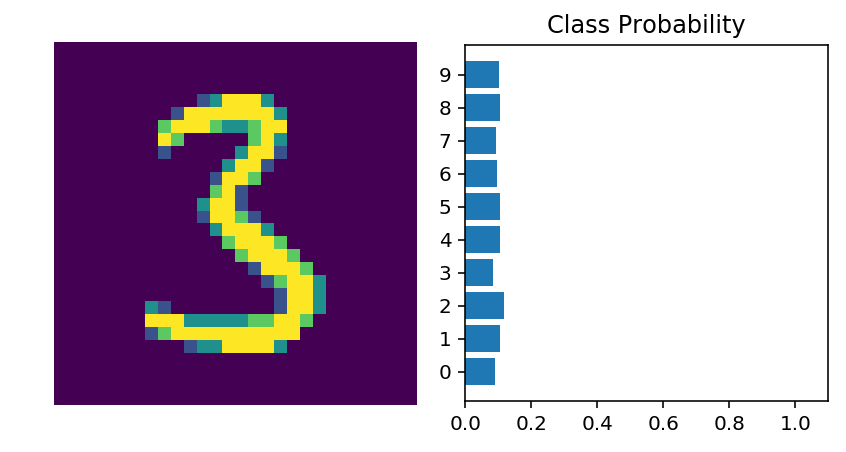

In [31]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

#Resize the images into 1D vector,new shape is (batch size, color channels, image pixels)
images.resize_(64, 1,784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

#forward pass
img_idx = 0
ps = model.forward(images[img_idx,:1])

img = images[img_idx]
helper.view_classify(img.view(1,28,28),ps)

In [32]:
ps

tensor([[0.0892, 0.1060, 0.1162, 0.0832, 0.1059, 0.1053, 0.0950, 0.0931, 0.1042,
         0.1019]], grad_fn=<SoftmaxBackward>)

use nn.Sequential to pass tensors which will do the forward function

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


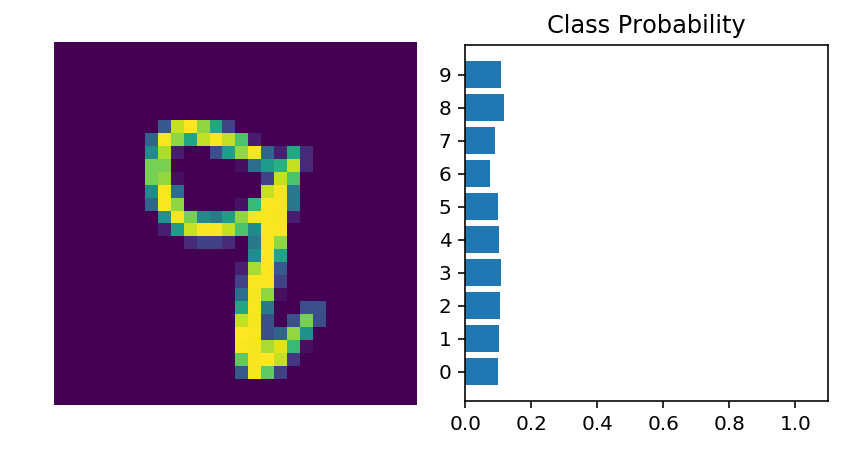

In [56]:
input_size = 784
hidden_size = [128,64]
output_size = 10

#feed-forward network

model = nn.Sequential(nn.Linear(input_size,hidden_size[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_size[0],hidden_size[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_size[1],output_size),
                     nn.Softmax(dim =1)
                     )

print(model)

#forward pass through model

images,labels = next(iter(trainloader))
images.resize_(images.shape[0],1,784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1,28,28),ps)

Calculate loss using **nn.CrossEntropyLoss()**

In [43]:
model = nn.Sequential(nn.Linear(784,128)
                      ,nn.ReLU()
                      ,nn.Linear(128,64)
                      ,nn.ReLU()
                      ,nn.Linear(64,10)
                     )
#print(model)

#Define loss
criterion = nn.CrossEntropyLoss()
#print(criterion)

#Get our data
images, labels = next(iter(trainloader))
#flatten images
images = images.view(images.shape[0],-1)

#forward pass and get the loss
logits = model(images)
#print(logits)

#calculate loss with CrossEntropyLoss
loss = criterion(logits,labels)
print(loss)

tensor(2.3469, grad_fn=<NllLossBackward>)


it's more convenient to build the model with a log-softmax output using nn.LogSoftmax or F.log_softmax (documentation). Then you can get the actual probabilites by taking the exponential torch.exp(output). With a log-softmax output, you want to use the negative log likelihood loss, nn.NLLLoss (documentation).


**Exercise**: 

Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood loss.

In [45]:
#Solution

#feed forward network
model = nn.Sequential(nn.Linear(784,128)
                      ,nn.ReLU()
                      ,nn.Linear(128,64)
                      ,nn.ReLU()
                      ,nn.Linear(64,10)
                      ,nn.LogSoftmax(dim=1)
                     )
print(model)

#Define loss
criterion = nn.NLLLoss()

#Get our data
images, labels = next(iter(trainloader))
#flatten images
images = images.view(images.shape[0],-1)


#forward pass, get logits
logits = model(images)

#calculate loss
loss = criterion(logits,labels)
print(loss)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)
tensor(2.3163, grad_fn=<NllLossBackward>)


In [46]:
print('Before backward pass: ',model[0].weight.grad)

loss.backward()

print('\nAfter backward pass: ',model[0].weight.grad)

Before backward pass:  None

After backward pass:  tensor([[-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [-0.0022, -0.0022, -0.0022,  ..., -0.0022, -0.0022, -0.0022],
        [-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018],
        ...,
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006]])


Using optimizer - optimizer = optim.SGD(model.parameters(),lr= 0.01)

optimizer is used to update the weights for training the system

In [48]:
from torch import optim

optimizer = optim.SGD(model.parameters(),lr = 0.01)

In [52]:
print('Initial weights', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64,784)

#clear gradients
optimizer.zero_grad()

#forward pass, backward pass, then update weight with optimizer

output = model.forward(images)
loss = criterion(output,labels)
loss.backward()
print('Gradient - ',model[0].weight.grad)

Initial weights Parameter containing:
tensor([[-0.0005, -0.0002,  0.0198,  ..., -0.0166,  0.0132, -0.0129],
        [ 0.0112, -0.0240, -0.0142,  ...,  0.0191,  0.0188,  0.0061],
        [ 0.0113, -0.0213, -0.0040,  ..., -0.0171, -0.0249,  0.0161],
        ...,
        [ 0.0232, -0.0196,  0.0273,  ...,  0.0025, -0.0255,  0.0250],
        [-0.0142, -0.0167, -0.0047,  ...,  0.0153,  0.0062, -0.0089],
        [-0.0236,  0.0151, -0.0324,  ..., -0.0296, -0.0143, -0.0013]],
       requires_grad=True)
Gradient -  tensor([[ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        ...,
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003]])


In [53]:
#use optimizer to step up the weights
optimizer.step()
print('Updated weights - ',model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0005, -0.0002,  0.0198,  ..., -0.0166,  0.0132, -0.0129],
        [ 0.0112, -0.0240, -0.0143,  ...,  0.0191,  0.0188,  0.0061],
        [ 0.0113, -0.0213, -0.0040,  ..., -0.0172, -0.0249,  0.0161],
        ...,
        [ 0.0232, -0.0196,  0.0273,  ...,  0.0025, -0.0255,  0.0250],
        [-0.0142, -0.0167, -0.0047,  ...,  0.0153,  0.0062, -0.0089],
        [-0.0237,  0.0151, -0.0324,  ..., -0.0296, -0.0143, -0.0013]],
       requires_grad=True)
